# STEP 1 - Cohort Analysis là gì? Lý do phân tích tổ hợp quan trọng trong phân tích dữ liệu Marketing

## A. IMPORT THƯ VIỆN

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

## B. UPLOAD DATA

In [2]:
# 2. Upload data => name file: House_data.xlsx
dir_file = "data_analysis/OnlineRetail.csv"
df = pd.read_csv(dir_file, encoding='latin1')

# convert object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# convert object to float
#df['UnitPrice'] = df['UnitPrice'].apply(lambda x: x.replace(',', '.'))
df['UnitPrice'] = df['UnitPrice'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## C. COHORT ANALYSIS

### 1.1. Thêm thời gian cho bài toán

In [4]:
# Get tháng
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

In [5]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [6]:
# Thêm hàn ngày tháng năm
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [7]:
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df['CohortIndex'] = years_diff * 12 + months_diff + 1

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1.0


### 1.2. Bảng đếm số lần khách hàng mua và quay lại sau 1 tháng

In [9]:
df['revenue'] = df['Quantity'] * df['UnitPrice']

In [10]:
# Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
#cohort_data = grouping.groupby(['CustomerID']).agg('count')
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [11]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,98.0,9.0,4.0,NaN,7.0,7.0,4.0,10.0,10.0,5.0,...,38.0,40.0,36.0,44.0,41.0,37.0,41.0,44.0,40.0,23.0
2010-02-01,108.0,2.0,NaN,NaN,3.0,7.0,5.0,12.0,5.0,NaN,...,39.0,38.0,43.0,48.0,34.0,41.0,45.0,53.0,19.0,NaN
2010-03-01,49.0,NaN,1.0,1.0,1.0,2.0,5.0,NaN,NaN,14.0,...,23.0,16.0,19.0,19.0,13.0,24.0,23.0,9.0,NaN,NaN
2010-05-01,68.0,3.0,3.0,2.0,3.0,1.0,NaN,24.0,32.0,20.0,...,30.0,32.0,31.0,33.0,40.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,76.0,2.0,4.0,4.0,1.0,NaN,26.0,29.0,25.0,25.0,...,27.0,33.0,26.0,39.0,5.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,53.0,2.0,2.0,1.0,NaN,9.0,24.0,22.0,22.0,19.0,...,22.0,20.0,29.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,87.0,3.0,2.0,NaN,30.0,37.0,30.0,34.0,33.0,36.0,...,41.0,49.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,83.0,1.0,NaN,23.0,29.0,20.0,30.0,23.0,29.0,26.0,...,32.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,38.0,NaN,11.0,15.0,12.0,15.0,18.0,8.0,14.0,11.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [13]:
retention.round(3) * 100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,100.0,9.2,4.1,NaN,7.1,7.1,4.1,10.2,10.2,5.1,...,38.8,40.8,36.7,44.9,41.8,37.8,41.8,44.9,40.8,23.5
2010-02-01,100.0,1.9,NaN,NaN,2.8,6.5,4.6,11.1,4.6,NaN,...,36.1,35.2,39.8,44.4,31.5,38.0,41.7,49.1,17.6,NaN
2010-03-01,100.0,NaN,2.0,2.0,2.0,4.1,10.2,NaN,NaN,28.6,...,46.9,32.7,38.8,38.8,26.5,49.0,46.9,18.4,NaN,NaN
2010-05-01,100.0,4.4,4.4,2.9,4.4,1.5,NaN,35.3,47.1,29.4,...,44.1,47.1,45.6,48.5,58.8,29.4,NaN,NaN,NaN,NaN
2010-06-01,100.0,2.6,5.3,5.3,1.3,NaN,34.2,38.2,32.9,32.9,...,35.5,43.4,34.2,51.3,6.6,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,3.8,3.8,1.9,NaN,17.0,45.3,41.5,41.5,35.8,...,41.5,37.7,54.7,11.3,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,3.4,2.3,NaN,34.5,42.5,34.5,39.1,37.9,41.4,...,47.1,56.3,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,100.0,1.2,NaN,27.7,34.9,24.1,36.1,27.7,34.9,31.3,...,38.6,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,100.0,NaN,28.9,39.5,31.6,39.5,47.4,21.1,36.8,28.9,...,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()

average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,12.2,7.1,13.2,NaN,6.0,10.7,8.8,13.8,6.2,6.9,...,14.7,13.6,13.7,10.3,14.9,11.9,15.3,12.5,10.3,8.9
2010-02-01,10.6,378.0,NaN,NaN,38.3,27.9,11.1,10.9,30.4,NaN,...,24.1,18.9,25.8,19.3,13.0,16.9,22.1,20.0,15.1,NaN
2010-03-01,8.5,NaN,5.9,1.8,0.0,-1.7,7.8,NaN,NaN,7.5,...,13.4,29.1,27.6,25.8,22.1,25.1,18.0,23.0,NaN,NaN
2010-05-01,6.0,17.1,8.0,12.2,5.1,1.8,NaN,11.6,12.9,10.3,...,10.3,9.2,9.4,6.6,8.3,10.5,NaN,NaN,NaN,NaN
2010-06-01,6.9,3.8,16.1,4.0,4.6,NaN,6.6,8.6,7.9,8.2,...,10.3,11.1,10.0,9.5,13.3,NaN,NaN,NaN,NaN,NaN
2010-07-01,18.1,6.6,11.9,38.0,NaN,14.2,8.8,13.2,24.2,31.2,...,53.7,20.5,19.4,13.6,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,10.2,10.5,54.7,NaN,8.4,12.4,10.7,9.9,8.3,11.0,...,11.4,10.9,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,10.3,6.8,NaN,12.7,9.4,9.9,13.6,7.7,14.4,10.5,...,14.5,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,8.2,NaN,4.2,13.9,12.3,9.1,11.9,17.0,8.4,16.6,...,37.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['revenue'].mean()
cohort_data = cohort_data.reset_index()

average_revenue = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='revenue')
average_revenue.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,23.4,21.0,31.9,NaN,11.8,25.1,15.5,19.7,18.7,13.0,...,20.3,22.2,21.3,18.2,24.6,20.1,21.5,19.4,16.7,14.8
2010-02-01,22.6,61.6,NaN,NaN,68.6,51.9,20.3,29.8,71.8,NaN,...,32.8,34.2,46.7,36.5,22.8,28.1,36.9,30.6,24.5,NaN
2010-03-01,18.7,NaN,9.2,3.8,0.0,-7.7,17.9,NaN,NaN,17.6,...,28.0,56.7,62.5,42.5,46.8,41.2,39.0,54.7,NaN,NaN
2010-05-01,11.5,39.6,24.3,77.7,12.8,4.0,NaN,19.7,18.8,19.4,...,16.7,14.3,16.2,12.2,15.1,18.1,NaN,NaN,NaN,NaN
2010-06-01,12.4,26.1,24.6,9.2,8.4,NaN,12.1,13.6,14.1,14.2,...,17.1,19.9,16.0,14.6,24.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,53.2,14.0,81.0,100.5,NaN,31.3,17.7,27.1,67.5,70.7,...,170.1,75.2,49.5,32.7,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,18.7,49.8,79.1,NaN,17.2,21.1,18.9,21.1,16.2,19.6,...,21.0,22.5,22.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,19.8,21.8,NaN,32.4,17.9,19.1,22.6,12.8,24.3,20.6,...,19.6,22.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,16.0,NaN,10.5,22.8,25.0,17.4,22.1,25.8,15.0,27.2,...,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


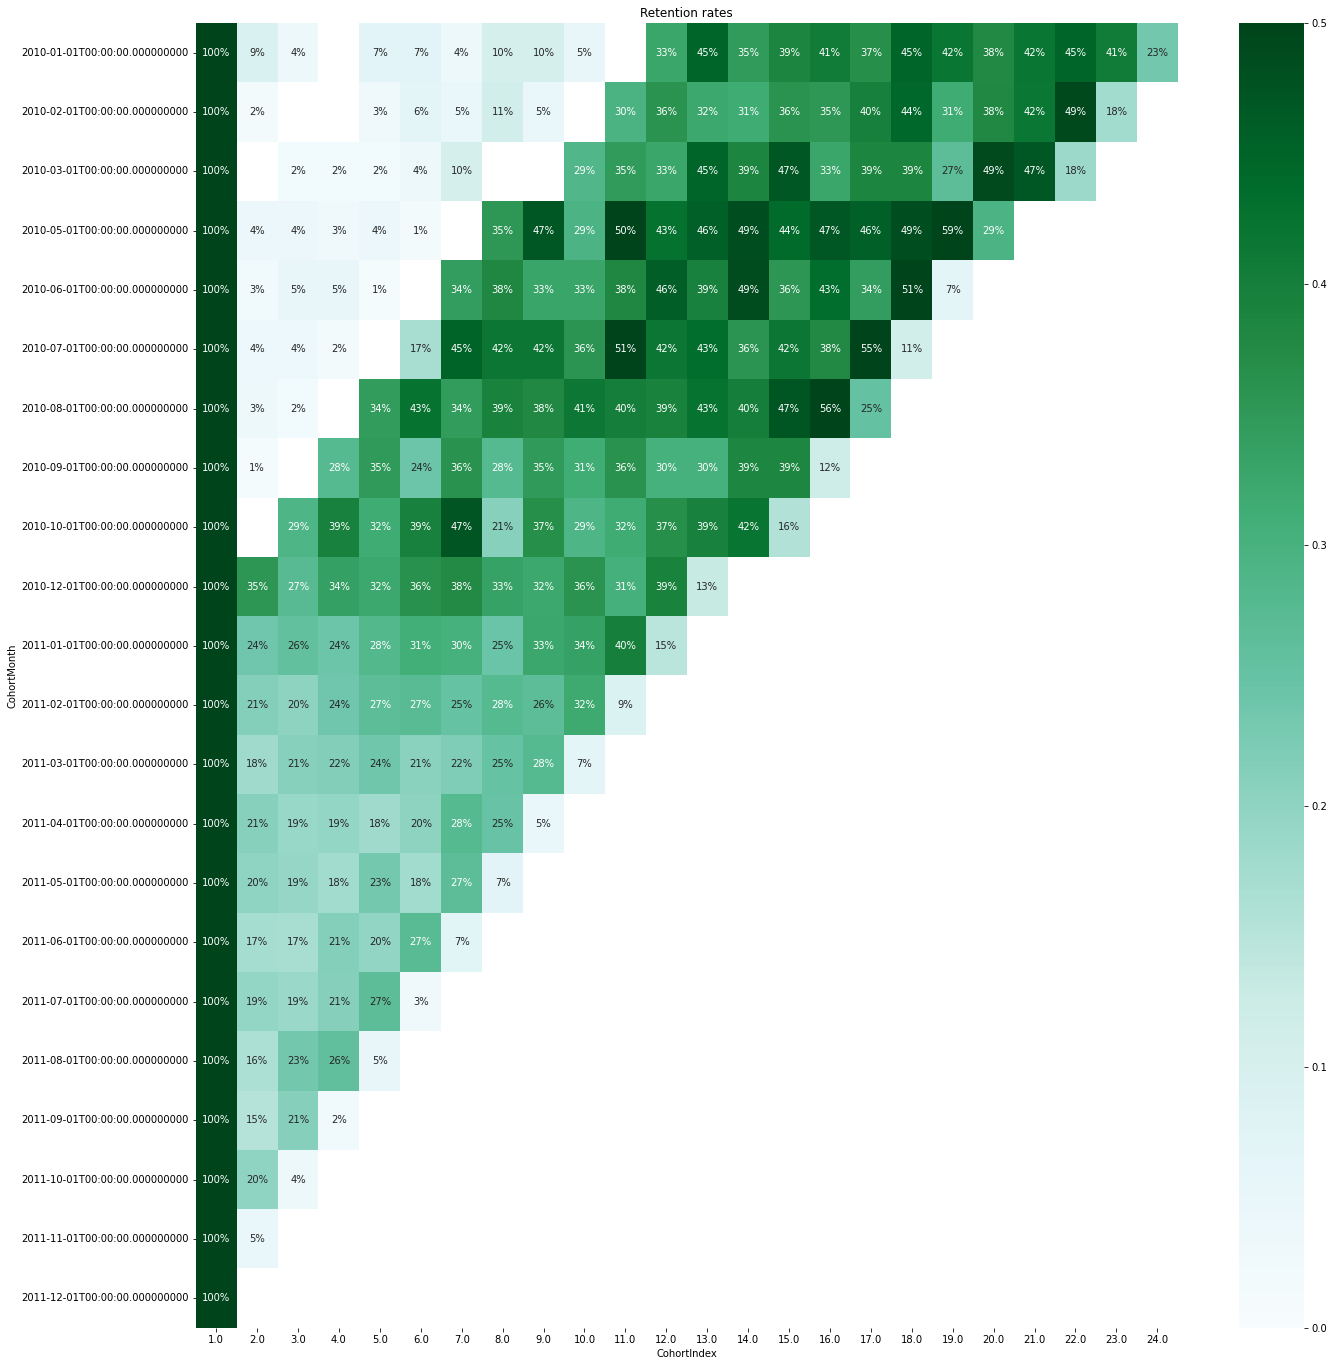

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 24))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'BuGn')
plt.show()

### Nhận xét:
- 

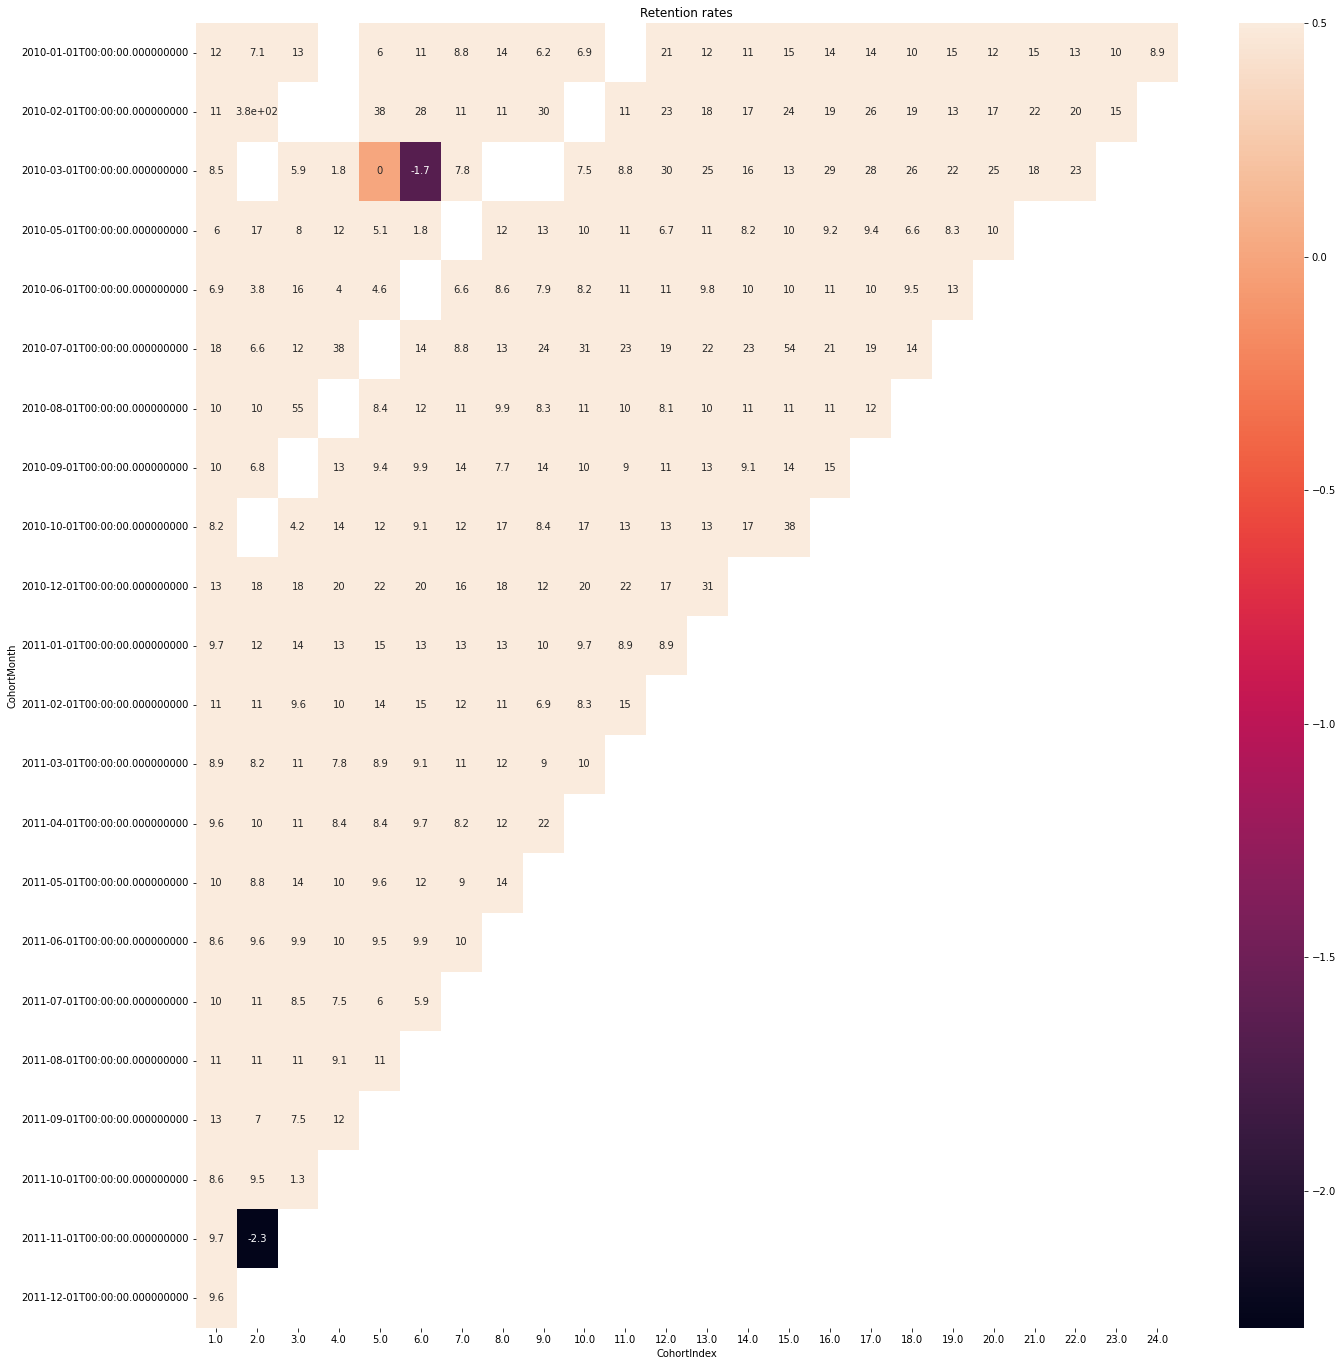

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 24))
plt.title('Retention rates')
sns.heatmap(data = average_quantity, annot = True, vmax = 0.5)
plt.show()

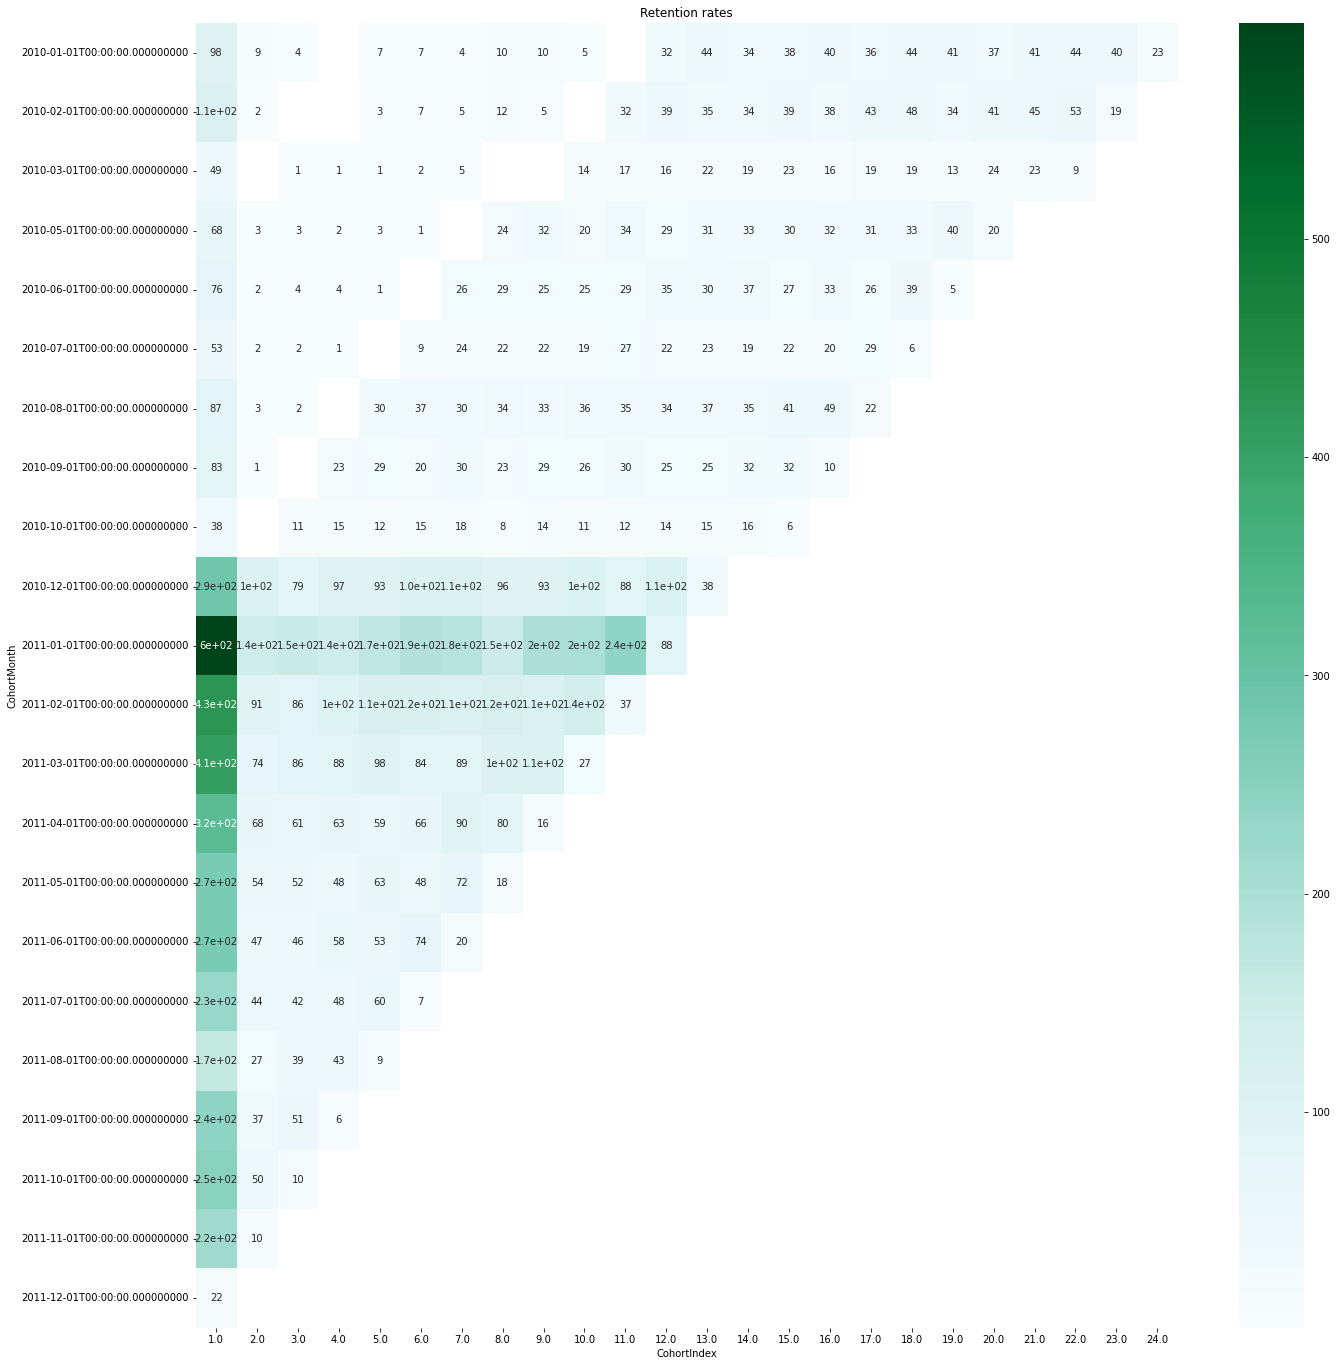

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 24))
plt.title('Retention rates')
sns.heatmap(data = cohort_counts, annot = True, cmap = 'BuGn')
plt.show()

# Nhận xét
- Khách hàng sẽ quay lại sau tháng thứ 12 cho ngày đâu tiên từ 33% lên 45% đến ngày thứ 12 thì giảm xuống và doanh thu cũng dữ khoảng 50%
- Retention: Lí do khiến cohort analysis trở lên quan trọng là vì nó giúp marketer vượt ra khỏi hạn chế của các chỉ số trung bình, giúp marketer có insight rõ ràng hơn và từ đó đưa ra các quyết định chính xác hơn
